## Simple RNNs

In this notebook, we are going to train a Simple RNNs to do a **time-series prediction**.

>* Create Data
* Define RNNs in PyTorch
* Train the model

### Import Library and create data

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


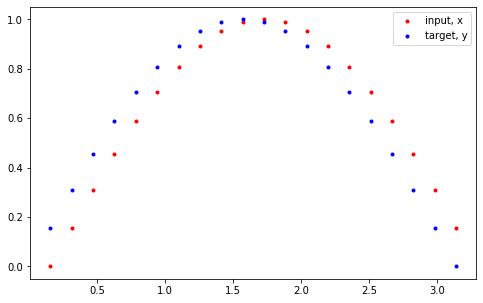

In [2]:
plt.figure(figsize=(8, 5))

#how many time step/data pts are in one batch of data
sequence = 20

# Generate Data pts
time_steps = np.linspace(0, np.pi, sequence + 1)
data = np.sin(time_steps)
data.resize((sequence + 1, 1))

x = data[:-1]
y = data[1:]

#plot the data points
plt.plot(time_steps[1:], x, 'r.', label = 'input, x')  # x
plt.plot(time_steps[1:], y, 'b.', label = 'target, y') # y

plt.legend(loc='best')
plt.show()

## Define RNN using PyTorch

In [3]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim = hidden_dim
        
        
        #deine the RNN
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first = True)
        
        #Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
         
        
    def forward(self, x, hidden):
            batch_size = x.size(0)
            r_out, hidden = self.rnn(x, hidden)
            r_out = r_out.view(-1, self.hidden_dim)
            
            #final output
            output = self.fc(r_out)
            return output, hidden

In [4]:
#test the dimensions

test_rnn = RNN( input_size=1, output_size = 1, hidden_dim = 10, n_layers =2)


# Generate Data pts
time_steps = np.linspace(0, np.pi, sequence + 1)
data = np.sin(time_steps)
data.resize((sequence, 1))

test_input = torch.Tensor(data).unsqueeze(0)

print ('Input size: {}'.format(test_input.size()))

test_out, test_h = test_rnn(test_input, None)
print ('Output size: {}'.format(test_out.size()))
print ('Hidden size: {}'.format(test_h.size()))

Input size: torch.Size([1, 20, 1])
Output size: torch.Size([20, 1])
Hidden size: torch.Size([2, 1, 10])


## Train the Model!!

Let's dive in. :)

In [5]:
# Model's Hyperparamters
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

#instantiate a RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print (rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


## Loss and optimizer!!



In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr = 0.01)

# Define the training Function

In [7]:
def train (rnn, steps, print_every):
    hidden = None
    
    for batch, step in enumerate(range(steps)):
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, sequence + 1)
        data = np.sin(time_steps)
        data.resize((sequence + 1, 1))
        
        x = data[:-1]
        y = data[1:]
        
        #Convert it into tensor
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)
        
        #Output
        prediction, hidden = rnn(x_tensor, hidden)
        
        hidden = hidden.data
        #Set optimizer to zero 
        optimizer.zero_grad()
        
        #Calculate the loss
        loss = criterion(prediction, y_tensor)
        
        #perform Backprop
        loss.backward()
        optimizer.step()
        
         # display loss and predictions
        if batch%print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()
    
    return rnn 
        
        
    

## Train it!!

Finally!!

Loss:  0.6329301595687866


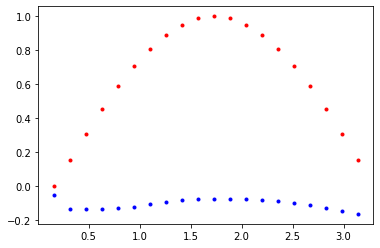

Loss:  0.06349427253007889


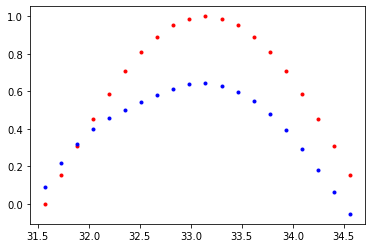

Loss:  0.011008521541953087


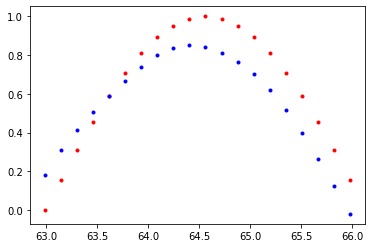

Loss:  0.002921287901699543


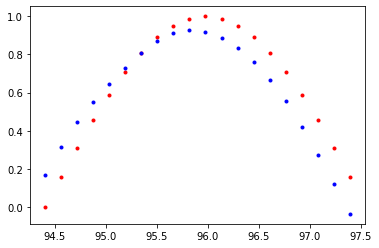

Loss:  0.00032376620220020413


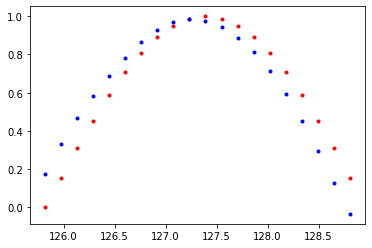

Loss:  0.0003875246620737016


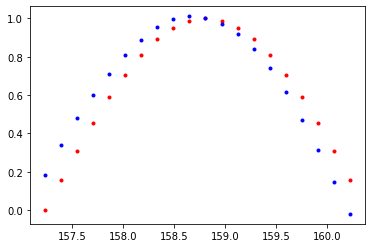

Loss:  0.0002874383353628218


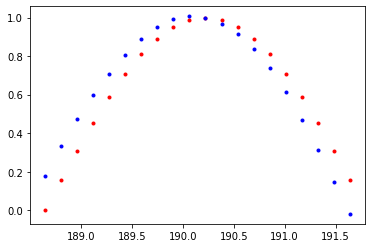

Loss:  0.0002127287007169798


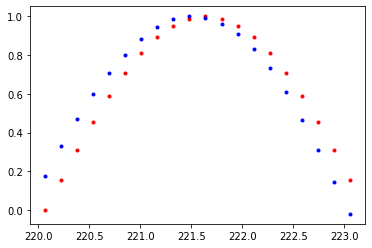

In [8]:
# Define some parameters
steps= 80
print_every = 10

train_rnn = train(rnn, steps, print_every)

### Time-Series Prediction

Time-series prediction can be applied to many tasks. Think about weather forecasting or predicting the ebb and flow of stock market prices. You can even try to generate predictions much further in the future than just one time step!